In [69]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import subprocess

## Task #1

In [11]:
file_path = 'v5.wav'
start = 16000
end = 24000

In [4]:
def read_audio(path):
    # path: path of audio file with .wav extansion
    sr, data = wavfile.read(path)
    data = data.astype('float32')
    return data

In [5]:
def write_audio(path, sr, data):
    # path: the path of output file,
    # sr: sampling rate
    # data: the audio waveform data
    data = data.astype('int16')
    wavfile.write(path, sr, data)
    return None

In [6]:
def compute_power(data):
    power = np.mean(data**2)
    return power

In [7]:
def plot_waveform(data, sampling_frequency=None):
    # data: the audio waveform data
    if sampling_frequency:
        sampling_period = 1 / sampling_frequency
        time_points = sampling_period * np.arange(len(data))
        plt.plot(time_points, data)
        plt.ylabel('amplitude')
        plt.xlabel('time [s]')
        plt.show()
    else:
        plt.plot(data)
        plt.ylabel('amplitude')
        plt.xlabel('samples')
        plt.show()
    return None

In [8]:
def change_sampling_rate(input_path, output_path, output_sr):
    # input_path: path of input audio file
    # output_path: path of output audio file
    # output_sr: sampling rate of autput_path, integer
    assert input_path != output_path, 'input_path and output_path should not coincide'
    # make sure you have installed ffmpeg
    subprocess.call(['ffmpeg', '-i', input_path, '-ar', str(output_sr), output_path])
    return None

### 1

In [12]:
audio = read_audio(file_path)

In [14]:
audio_power = compute_power(audio)

In [15]:
audio_power

18116592.0

### 2

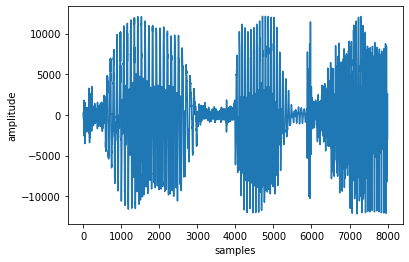

In [18]:
plot_waveform(audio[start:end])

### 3

In [21]:
import random

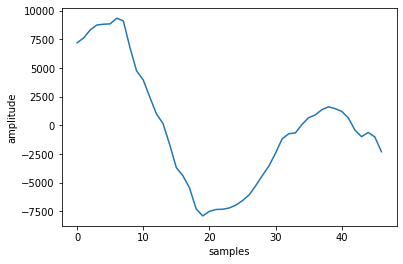

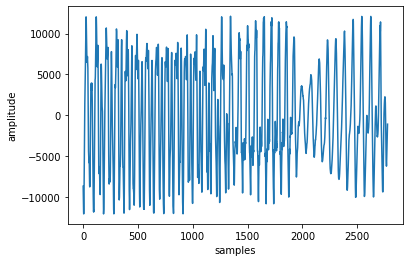

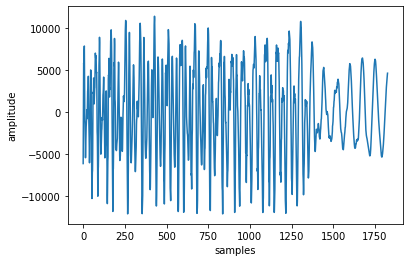

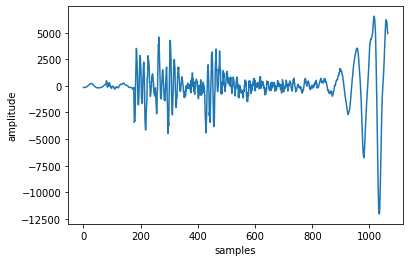

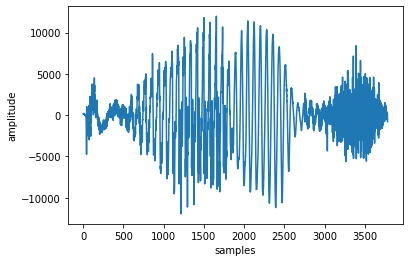

In [27]:
for _ in range(5):
    step = random.randrange(0, 10000)
    st = random.randrange(0, len(audio)-10000)
    num1 = random.randrange(st, st+step)
    num2 = random.randrange(st, st+step)
    start = min(num1, num2)
    end = max(num1, num2)
    plot_waveform(audio[start:end])

### 4

In [64]:
new_audio = audio * 2

In [65]:
new_audio_path = "v5_volume_2.wav"
sr = 16000

In [66]:
write_audio(new_audio_path, sr, new_audio)

### 5

In [67]:
output_path = "v5_sr_2.wav"

In [68]:
change_sampling_rate(file_path, output_path, 8000)

ffmpeg version 5.1.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2.5)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.1.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox


## Task #2

In [326]:
Fs = 44100

In [327]:
def KS(x, N, alpha):
    y = np.zeros(N)
    M = len(x)
    
    for n in range(N):
        y[n] = (x[n] if n < M else 0) + alpha*(y[n-M] if n-M>=0 else 0)
        
    return y

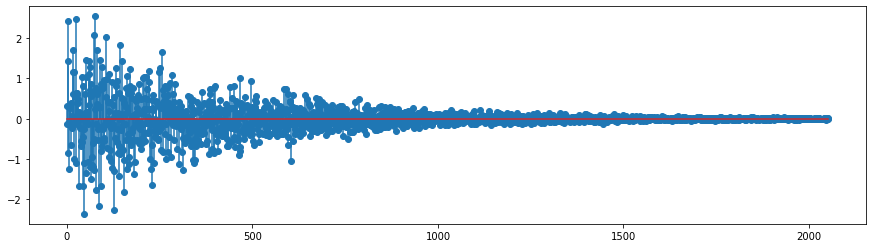

In [328]:
y = KS(np.random.randn(2000), Fs*2, 0.9)

plt.figure(figsize=(15,4))
plt.stem(y[0:Fs*2:43]) 
plt.show()

In [329]:
Audio(y, rate=Fs)

In [331]:
write_audio("generated.wav", 44100, y)